<a href="https://colab.research.google.com/github/YonDraco/learn-pyimagesearch/blob/master/5_opencv_augmented_reality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

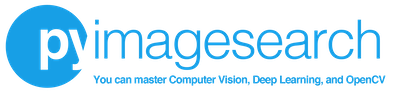

# OpenCV Augmented Reality (AR)

### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [OpenCV Augmented Reality (AR)](https://www.pyimagesearch.com/2021/01/04/opencv-augmented-reality-ar/) blog post published on 01-04-21.

The entire blog post is not recreated here; be sure to refer to the blog post to learn the concepts and read the complete code walkthrough. Only the code for the blog post is here and most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed. Our recommmendation is that you run the code block-by-block as-is prior to adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2021 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible joining PyImageSearch Plus at [http://pyimg.co/plus/](http://pyimg.co/plus) today.*

### Download the code zip file

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-augmented-reality/opencv-augmented-reality.zip
!unzip -qq opencv-augmented-reality.zip
%cd opencv-augmented-reality

--2021-08-25 15:50:37--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-augmented-reality/opencv-augmented-reality.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.251.49
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.251.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19165499 (18M) [application/zip]
Saving to: ‘opencv-augmented-reality.zip’

opencv-augmented-re 100%[===================>]  18.28M  39.0MB/s    in 0.5s    

2021-08-25 15:50:38 (39.0 MB/s) - ‘opencv-augmented-reality.zip’ saved [19165499/19165499]

/content/opencv-augmented-reality


## Blog Post Code

### Import Packages

In [2]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing augmented reality with OpenCV

In [4]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image containing ArUCo tag")
# ap.add_argument("-s", "--source", required=True,
# 	help="path to input source image that will be put on input")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "examples/input_01.jpg",
    "source": "sources/squirrel.jpg"
}

In [5]:
# load the input image from disk, resize it, and grab its spatial
# dimensions
print("[INFO] loading input image and source image...")
image = cv2.imread(args["image"])
image = imutils.resize(image, width=600)
(imgH, imgW) = image.shape[:2]

# load the source image from disk
source = cv2.imread(args["source"])

[INFO] loading input image and source image...


In [6]:
# load the ArUCo dictionary, grab the ArUCo parameters, and detect
# the markers
print("[INFO] detecting markers...")
arucoDict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)
arucoParams = cv2.aruco.DetectorParameters_create()
(corners, ids, rejected) = cv2.aruco.detectMarkers(image, arucoDict,
	parameters=arucoParams)

# if we have not found four markers in the input image then we cannot
# apply our augmented reality technique
if len(corners) != 4:
	print("[INFO] could not find 4 corners...exiting")

[INFO] detecting markers...


In [7]:
# otherwise, we've found the four ArUco markers, so we can continue
# by flattening the ArUco IDs list and initializing our list of
# reference points
print("[INFO] constructing augmented reality visualization...")
ids = ids.flatten()
refPts = []

# loop over the IDs of the ArUco markers in top-left, top-right,
# bottom-right, and bottom-left order
for i in (923, 1001, 241, 1007):
	# grab the index of the corner with the current ID and append the
	# corner (x, y)-coordinates to our list of reference points
	j = np.squeeze(np.where(ids == i))
	corner = np.squeeze(corners[j])
	refPts.append(corner)

[INFO] constructing augmented reality visualization...


In [8]:
# unpack our ArUco reference points and use the reference points to
# define the *destination* transform matrix, making sure the points
# are specified in top-left, top-right, bottom-right, and bottom-left
# order
(refPtTL, refPtTR, refPtBR, refPtBL) = refPts
dstMat = [refPtTL[0], refPtTR[1], refPtBR[2], refPtBL[3]]
dstMat = np.array(dstMat)

# grab the spatial dimensions of the source image and define the
# transform matrix for the *source* image in top-left, top-right,
# bottom-right, and bottom-left order
(srcH, srcW) = source.shape[:2]
srcMat = np.array([[0, 0], [srcW, 0], [srcW, srcH], [0, srcH]])

# compute the homography matrix and then warp the source image to the
# destination based on the homography
(H, _) = cv2.findHomography(srcMat, dstMat)
warped = cv2.warpPerspective(source, H, (imgW, imgH))

In [9]:
# construct a mask for the source image now that the perspective warp
# has taken place (we'll need this mask to copy the source image into
# the destination)
mask = np.zeros((imgH, imgW), dtype="uint8")
cv2.fillConvexPoly(mask, dstMat.astype("int32"), (255, 255, 255),
	cv2.LINE_AA)

# this step is optional, but to give the source image a black border
# surrounding it when applied to the source image, you can apply a
# dilation operation
rect = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
mask = cv2.dilate(mask, rect, iterations=2)

# create a three channel version of the mask by stacking it depth-wise,
# such that we can copy the warped source image into the input image
maskScaled = mask.copy() / 255.0
maskScaled = np.dstack([maskScaled] * 3)

# copy the warped source image into the input image by (1) multiplying
# the warped image and masked together, (2) multiplying the original
# input image with the mask (giving more weight to the input where
# there *ARE NOT* masked pixels), and (3) adding the resulting
# multiplications together
warpedMultiplied = cv2.multiply(warped.astype("float"), maskScaled)
imageMultiplied = cv2.multiply(image.astype(float), 1.0 - maskScaled)
output = cv2.add(warpedMultiplied, imageMultiplied)
output = output.astype("uint8")

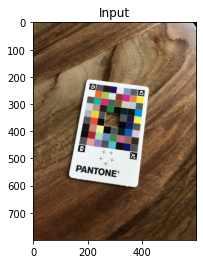

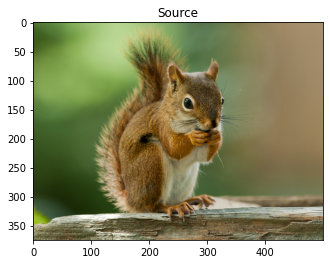

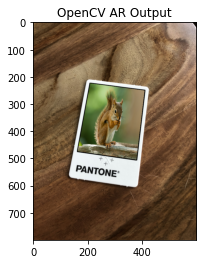

In [10]:
# show the input image, source image, output of our augmented reality
plt_imshow("Input", image)
plt_imshow("Source", source)
plt_imshow("OpenCV AR Output", output)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*OpenCV Augmented Reality (AR)*](https://www.pyimagesearch.com/2021/01/04/opencv-augmented-reality-ar/) blog post published on 01-04-21.

# Code License Agreement
```
Copyright (c) 2021 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```